In [1]:
!pip install scikit-image

In [2]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import time


## Download dataset

In [3]:
!gdown --id 1PdWkZe8Vt6xdsTj8KeqxhAd5Tmx4pyNh

/home/mhtuan/anaconda3/envs/myenv/lib/python3.11/site-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1PdWkZe8Vt6xdsTj8KeqxhAd5Tmx4pyNh
From (redirected): https://drive.google.com/uc?id=1PdWkZe8Vt6xdsTj8KeqxhAd5Tmx4pyNh&confirm=t&uuid=d058af5a-d7cd-4066-ab99-d9f22b323c31
To: /home/mhtuan/university/hk2_3/xla/img_process/wb_recognition_dataset.zip
100%|████████████████████████████████████████| 105M/105M [00:11<00:00, 9.27MB/s]


## Unzip data

In [4]:
!unzip /content/wb_recognition_dataset.zip &> /dev/null

In [5]:
!ls -la
!pwd

total 196416
drwxrwxr-x    5 mhtuan mhtuan      4096 Thg 5  19 14:47  .
drwxrwxr-x    6 mhtuan mhtuan      4096 Thg 5  19 11:11  ..
-rw-rw-r--    1 mhtuan mhtuan  48087995 Thg 4  28 14:33  adap_thresh.zip
-rw-rw-r--    1 mhtuan mhtuan     12408 Thg 4  28 12:31  compare.png
-rw-rw-r--    1 mhtuan mhtuan      1651 Thg 4  28 11:26  e1.png
-rw-rw-r--    1 mhtuan mhtuan      1663 Thg 4  28 11:26  e2.png
-rw-rw-r--    1 mhtuan mhtuan      1616 Thg 4  28 11:26  e3.png
-rw-rw-r--    1 mhtuan mhtuan      1778 Thg 4  21 19:10  fill.jpg
-rw-rw-r--    1 mhtuan mhtuan    204059 Thg 4  25 09:22 'HCCR_CNV (1).ipynb'
-rw-rw-r--    1 mhtuan mhtuan   1122264 Thg 4  22 01:18  img_label.csv
-rw-rw-r--    1 mhtuan mhtuan      2411 Thg 4  21 11:36  improved_image.jpg
-rw-rw-r--    1 mhtuan mhtuan     23890 Thg 5  19 14:47  linh.ipynb
-rw-rw-r--    1 mhtuan mhtuan      3893 Thg 4  22 01:24  output.png
drwxrwxr-x 2132 mhtuan mhtuan     53248 Thg 4  28 14:29  processed_img
drwxrwxr-x 2132 mhtuan mhtuan     532

In [6]:
cnv_local_dir = 'wb_recognition_dataset'
colab_dir = '/content/wb_recognition_dataset'
dataset_dir = cnv_local_dir
train_dataset_dir = dataset_dir + '/train'
val_dataset_dir = dataset_dir + '/val'
val_dataset_img_dir = val_dataset_dir + '/images'
annotations_file_dir = val_dataset_dir + '/labels.csv'

## Tests

In [7]:
images = []
example_dir = train_dataset_dir + "/16"
for filename in os.listdir(example_dir):
    img = cv2.imread(os.path.join(example_dir,filename))
    if img is not None:
        images.append(img)

In [8]:
def display_image(images, titles=None):
  if titles is None:
    titles = [None] * len(images)

  images = images[:4]
  titles = titles[:4]

  fig, axes = plt.subplots(1, len(images))  # Adjust figsize as needed

  for i, (image, title) in enumerate(zip(images, titles)):
    axes[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axes[i].set_title(title)
    axes[i].axis('off')

  plt.tight_layout()
  plt.show()

def enhance_adapt(image, block_size=19, constant=17, method=cv2.ADAPTIVE_THRESH_GAUSSIAN_C):
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  th = cv2.adaptiveThreshold(gray, 255, method, cv2.THRESH_BINARY, block_size, constant)
  return th

def enhance_otsu(img):
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  ret, th = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
  return th

0.0003523826599121094
0.0001354217529296875


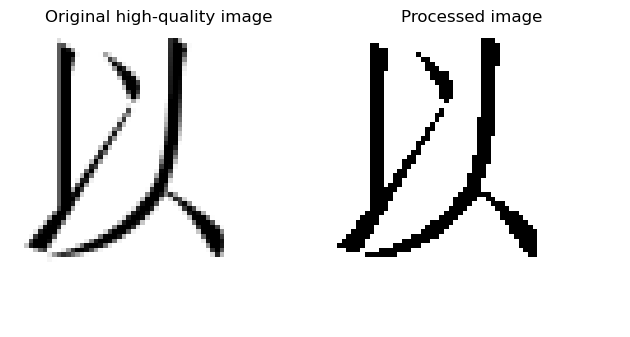

In [13]:
example_img = cv2.imread('/home/mhtuan/university/hk2_3/xla/img_process/wb_recognition_dataset/train/3/19_3.png')
start = time.time()
enhanced1 = enhance_adapt(example_img, 71, 22, cv2.ADAPTIVE_THRESH_GAUSSIAN_C)
end = time.time()
print(end - start)
start = time.time()
enhanced2 = enhance_adapt(example_img, 31, 19, cv2.ADAPTIVE_THRESH_MEAN_C)
end = time.time()
print(end - start)
display_image([example_img, enhanced1], titles=["Original high-quality image", "Processed image"])


0.00022673606872558594
0.00010800361633300781
5.340576171875e-05


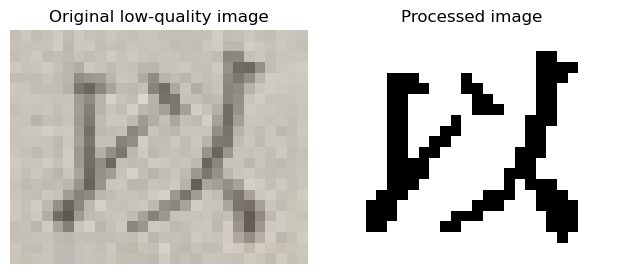

In [14]:
example_img = cv2.imread('/home/mhtuan/university/hk2_3/xla/img_process/wb_recognition_dataset/train/3/nlvnpf-0140-01-009_crop_100.jpg')
start = time.time()
enhanced1 = enhance_adapt(example_img, 71, 22, cv2.ADAPTIVE_THRESH_GAUSSIAN_C)
end = time.time()
print(end - start)
start = time.time()
enhanced2 = enhance_adapt(example_img, 31, 19, cv2.ADAPTIVE_THRESH_MEAN_C)
end = time.time()
print(end - start)
start = time.time()
enhanced3 = enhance_otsu(example_img)
end = time.time()
print(end - start)
display_image([example_img, enhanced1], titles=["Original low-quality image", "Processed image"])

# Final